## Downsampling Time Index Acticity
Downsampling activity using historical stock data of AAPL to find the average monthly stock price close through the months of February and May 2023.

In [98]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
#importing data
df = pd.read_csv('/kaggle/input/stock-price-action-data-set/stocks.csv', parse_dates = ['Date'], index_col = 'Date')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [105]:
df.shape

(248, 7)

In [106]:
df.isnull().sum()

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [108]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.64,155.23,150.64,154.65,154.41,83322600.0
2023-02-08,AAPL,153.88,154.58,151.17,151.92,151.69,64120100.0
2023-02-09,AAPL,153.78,154.33,150.42,150.87,150.64,56007100.0
2023-02-10,AAPL,149.46,151.34,149.22,151.01,151.01,57450700.0
2023-02-13,AAPL,150.95,154.26,150.92,153.85,153.85,62199000.0


In [115]:
#subsetting for ticker AAPL
AAPL = df[df['Ticker'] == 'AAPL']

#Dropping ticker column 
del AAPL['Ticker']

#Setting frequency daily for AAPL 
AAPL = AAPL.resample('D').asfreq()

#Resampling frequency to month 
AAPL = round(AAPL.resample('M').mean(),2)

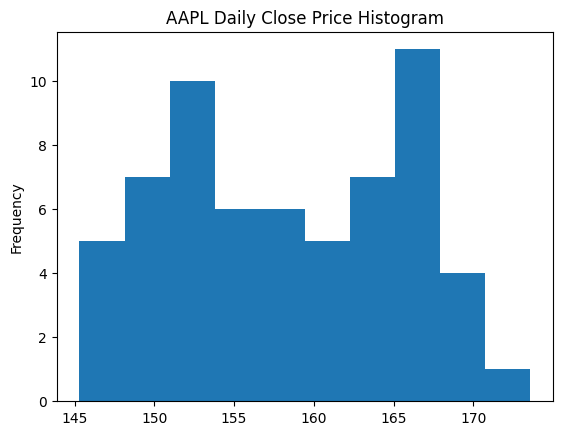

In [141]:
#Visualizing distribution of AAPL closing 
AAPL1['Close'].plot(title = 'AAPL Daily Close Price Histogram',kind = 'hist', bins = 10)
plt.show()

In [138]:
#subsetting for ticker stat metrics
AAPL1 = df[df['Ticker'] == 'AAPL']

#statistical metrics
round(AAPL1['Close'].agg(['mean','median','std']),2)

mean      158.24
median    158.06
std         7.36
Name: Close, dtype: float64

The distribution of the daily close for AAPL has a bimodal distrubution. However, there is little difference between the mean and median daily close price. When downsampling I will aggreagte dat ausing mean.

In [116]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2023-02-28 to 2023-05-31
Freq: M
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4 non-null      float64
 1   High       4 non-null      float64
 2   Low        4 non-null      float64
 3   Close      4 non-null      float64
 4   Adj Close  4 non-null      float64
 5   Volume     4 non-null      float64
dtypes: float64(6)
memory usage: 224.0 bytes


In [117]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-28,150.72,152.36,149.54,151.06,151.01,59132046.67
2023-03-31,154.46,156.36,153.24,154.96,154.96,66098547.83
2023-04-30,164.44,165.93,163.55,165.05,165.05,51037352.63
2023-05-31,168.95,170.61,167.68,168.99,168.99,72117280.00


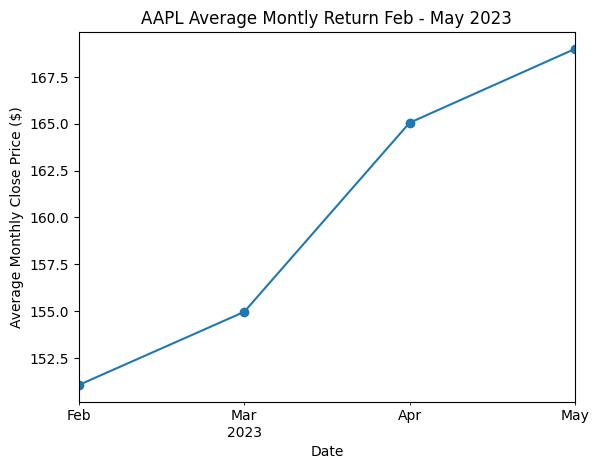

In [124]:
#Visualizing downsampled monthly AAPL Close data
AAPL['Close'].plot(title = 'AAPL Average Montly Return Feb - May 2023',ylabel = 'Average Monthly Close Price ($)' ,marker = 'o')
plt.show()